# Лабораторная работа №2. Дискретные LTI системы.

Лаборатория цифровой обработки сигналов, ФРКТ МФТИ


Дискретные LTI системы (англ. Linear time-invariant system) — линейные стационарные дискретные системы.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import signal
import time

# Модуль 1. Линейная дискретная свертка.

## Задача 1.1. Линейная дискретная свертка прямоугольных окон 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $M$    | 4 | 5 | 6 | 4 | 5 | 6 | 8 | 7 | 8 | 7 |

Вычислить аналитически линейную дискретную свертку двух одинаковых последовательностей $x[k]$ и $h[k]$, таких, что 
$$x[k]=h[k]=\sum_{m=0}^{M-1}\mathbf{1} [k-m], $$ 
где $M$ соответствует варианту, непосредственно воспользовавшись формулой линейной дискретной свертки
$$y[k]=\sum_{m=-\infty}^{\infty} x[m] h[k-m].$$

Проверить результаты с помощью моделирования, воспользовавшись функцией `signal.convolve`

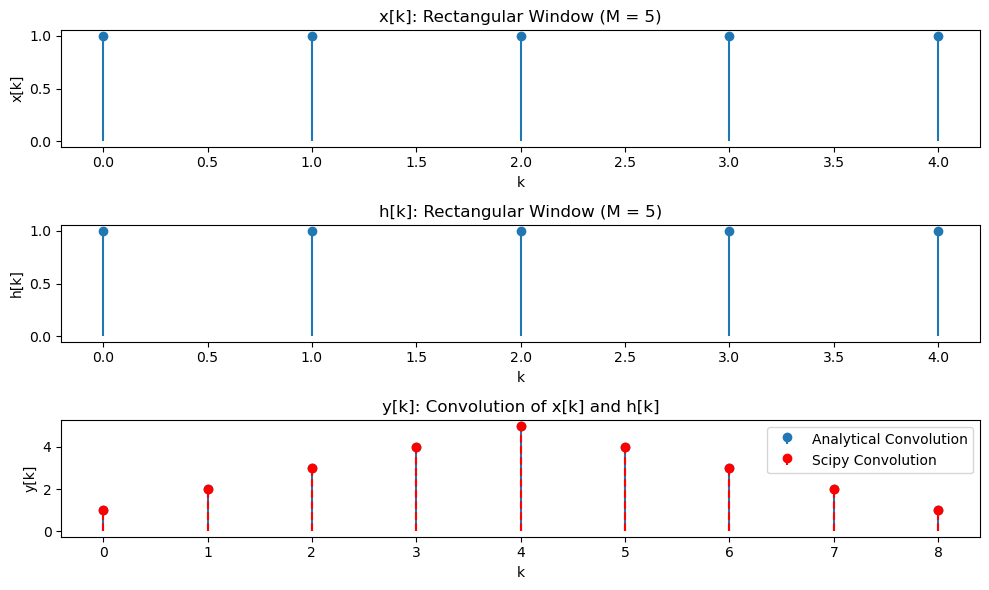

Analytical convolution result y[k]: [1. 2. 3. 4. 5. 4. 3. 2. 1.]
Scipy convolution result y[k]: [1. 2. 3. 4. 5. 4. 3. 2. 1.]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Variant 2: M = 5 (rectangular window)
M = 5

# Define the rectangular window sequences x[k] and h[k]
x = np.ones(M)
h = np.ones(M)

# Step 1: Compute the convolution analytically (using numpy.convolve with 'full' mode)
y_analytical = np.convolve(x, h, mode='full')

# Step 2: Compute the convolution using scipy's signal.convolve function
y_scipy = signal.convolve(x, h)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot x[k]
plt.subplot(3, 1, 1)
plt.stem(np.arange(len(x)), x, basefmt=" ")
plt.title('x[k]: Rectangular Window (M = 5)')
plt.xlabel('k')
plt.ylabel('x[k]')

# Plot h[k] (same as x[k] since h[k] = x[k])
plt.subplot(3, 1, 2)
plt.stem(np.arange(len(h)), h, basefmt=" ")
plt.title('h[k]: Rectangular Window (M = 5)')
plt.xlabel('k')
plt.ylabel('h[k]')

# Plot the convolution result y[k]
plt.subplot(3, 1, 3)
plt.stem(np.arange(len(y_analytical)), y_analytical, basefmt=" ", label='Analytical Convolution')
plt.stem(np.arange(len(y_scipy)), y_scipy, basefmt=" ", linefmt='r--', markerfmt='ro', label='Scipy Convolution')
plt.title('y[k]: Convolution of x[k] and h[k]')
plt.xlabel('k')
plt.ylabel('y[k]')
plt.legend()

plt.tight_layout()
plt.show()

# Print the results to compare
print("Analytical convolution result y[k]:", y_analytical)
print("Scipy convolution result y[k]:", y_scipy)


## Задача 1.2. Эффективное вычисление свертки 




| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ |    $7$ |    $8$ |    $9$ |    $10$ |  
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|    $N$    | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ | $2^{17}$ | $2^{18}$ |
|$n_0$| $128$ | $32$ | $256$ | $64$ | $512$ | $1024$ | $230$ | $325$ | $501$ | $1000$ |

Даны последовательности отсчетов
$$ x[k]= \cos(2\pi kn_0/N)$$  
$$ h[k]= \sin(2\pi kn_0/N)$$  
где $n_0$, $N$ взять из таблицы сверху в соответствии с вариантом и $k$ пробегает значения от $0$ до $N-1.$  
Вычислить их линейную дискретную свертку c помощью `signal.convolve()` двумя способами: с помощью прямого вычисления по формуле свёртки и с использованием алгоритма БПФ.  
Сравнить вычислительную эффективность, сделать вывод. 

P.S. На вычисление свертки по формуле может потребоваться значительное колличество времени. 



Time taken for direct convolution: 0.07053 seconds
Time taken for FFT-based convolution: 0.67111 seconds


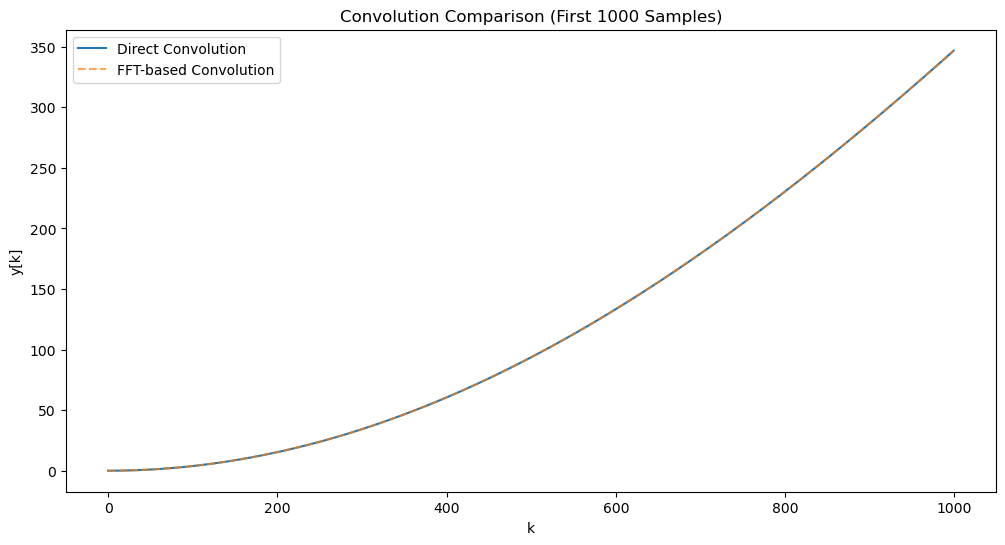

Direct convolution result (first 10 values): [2.13433743e-12 7.66990321e-04 2.30097028e-03 4.60193830e-03
 7.66989191e-03 1.15048277e-02 1.61067414e-02 2.14756279e-02
 2.76114809e-02 3.45142936e-02]
FFT-based convolution result (first 10 values): [1.77223791e-11 7.66990330e-04 2.30097031e-03 4.60193828e-03
 7.66989194e-03 1.15048277e-02 1.61067414e-02 2.14756279e-02
 2.76114809e-02 3.45142936e-02]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import time

# Given values for Variant 2
N = 2**18  # N = 2^18
n0 = 32  # n0 = 32

# Generate the sequences x[k] and h[k]
k = np.arange(N)
x = np.cos(2 * np.pi * k * n0 / N)
h = np.sin(2 * np.pi * k * n0 / N)

# Method 1: Direct convolution using signal.convolve
start_time_direct = time.time()
y_direct = signal.convolve(x, h, mode='full')
time_direct = time.time() - start_time_direct

# Method 2: Efficient convolution using FFT
start_time_fft = time.time()
# Perform the convolution using the FFT
X_fft = np.fft.fft(x, n=2*N-1)  # Zero-pad to length 2N-1
H_fft = np.fft.fft(h, n=2*N-1)
Y_fft = X_fft * H_fft
y_fft = np.fft.ifft(Y_fft).real  # Inverse FFT to get the convolution result
time_fft = time.time() - start_time_fft

# Compare computation times
print(f"Time taken for direct convolution: {time_direct:.5f} seconds")
print(f"Time taken for FFT-based convolution: {time_fft:.5f} seconds")

# Plot the results for comparison (a small portion due to large N)
plt.figure(figsize=(12, 6))

# Plot the first 1000 samples of the result
plt.plot(y_direct[:1000], label='Direct Convolution')
plt.plot(y_fft[:1000], '--', label='FFT-based Convolution', alpha=0.7)
plt.title('Convolution Comparison (First 1000 Samples)')
plt.xlabel('k')
plt.ylabel('y[k]')
plt.legend()
plt.show()

# Print a small portion of the results for comparison
print("Direct convolution result (first 10 values):", y_direct[:10])
print("FFT-based convolution result (first 10 values):", y_fft[:10])


# Модуль 2. Характеристики LTI систем.






## Задача 2.1. Фильтр скользящего среднего

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|$M_1$|  9 | 14 | 13 |  9 | 12 |  11 | 14 | 13 |  9 | 12 |
|$M_2$| 29 | 50 | 40 | 24 | 50 |  45 | 50 | 40 | 24 | 50 |
| $K$ | 35 | 63 | 57 | 35 | 63 |  55 | 63 | 57 | 35 | 63 |
| $N$ |100 |140 |130 |100 |140 | 115 |140 | 130 | 100 | 140 |

Рассмотрите фильтр скользящего среднего

$$y[k]=\dfrac{1}{M}\sum_{m=0}^{M-1} x[k-m]$$

для $M = M_1$ и $M = M_2$ (из таблицы): 

* Определите и изобразите импульсную характеристику $h[k]$ фильтра.

* Вычислите с помощью `signal.convolve` отклик $y[k]$ фильтра на входное воздействие вида
$$ x_{noise}[k] = \sin(2\pi k / K) + \varepsilon[k], 0\le k\le N-1.$$
где $K,\;N$ — соответствующие числа из таблицы, $\varepsilon[k]$ — белый гаусовский шум (`np.random.normal(mu, sigma, N)`) с нулевым среднем `mu=0` и  среднеквадратическим отклонением $\sigma=0.1$ (`sigma=0.1`).  
* Сравните сигналы $x_{noise}[k]$, $y[k]$ и 
$$ x[k] = \sin(2\pi k / K), 0\le k\le N-1.$$
* Определите и изобразите амплитудно-частотную характеристику (АЧХ) $|H(\nu)|$ фильтра. Как выбор $M$ влияет на результат фильтрации отрезка гармонического сигнала?

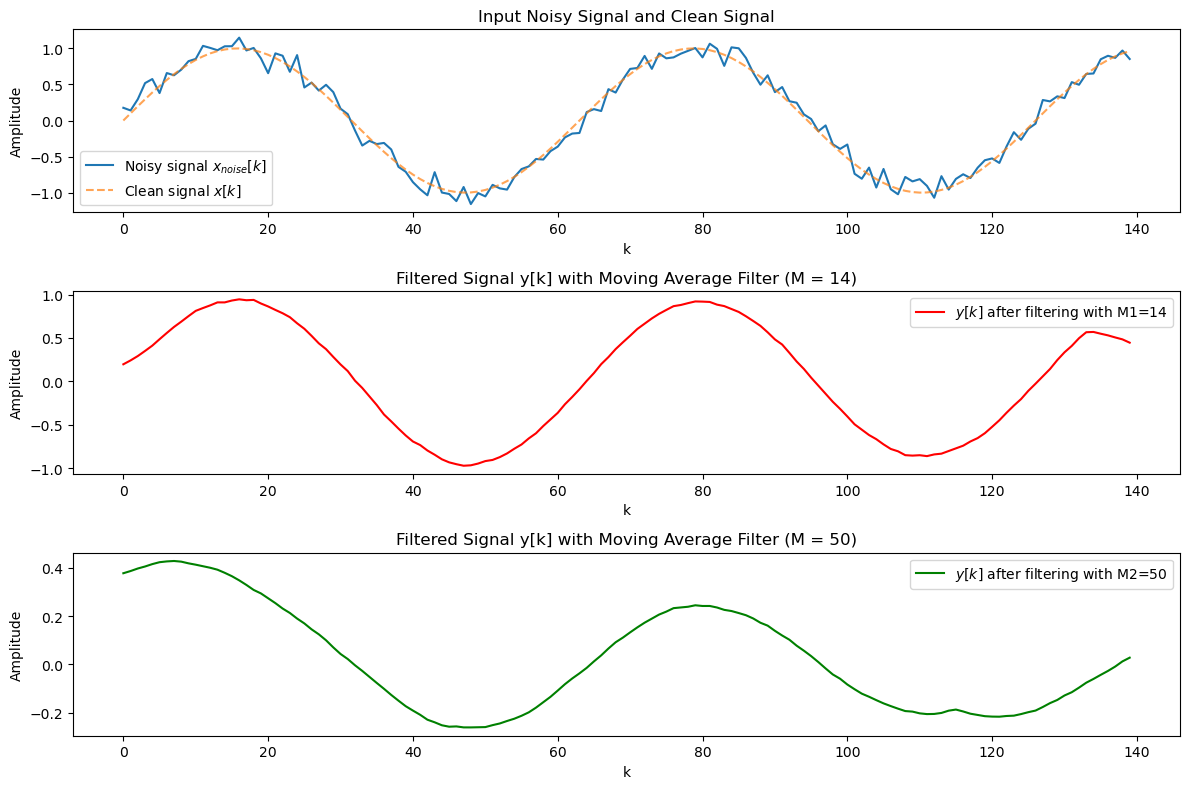

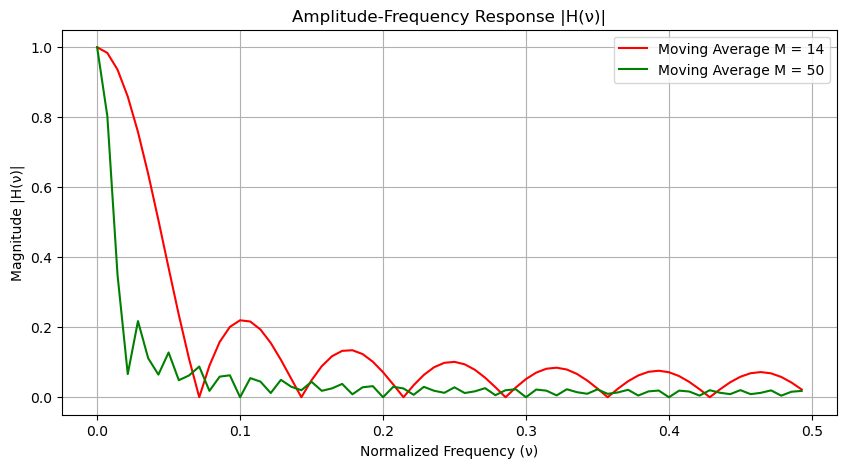

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Given parameters for variant 2
M1 = 14
M2 = 50
K = 63
N = 140

# Time indices
k = np.arange(N)

# Step 1: Define the input signals
x_clean = np.sin(2 * np.pi * k / K)  # Clean sinusoidal signal
np.random.seed(0)  # For reproducibility
noise = np.random.normal(0, 0.1, N)  # White Gaussian noise with sigma = 0.1
x_noise = x_clean + noise  # Noisy input signal

# Step 2: Define the impulse response h[k] of the moving average filter
h_M1 = np.ones(M1) / M1  # Moving average filter with M = M1
h_M2 = np.ones(M2) / M2  # Moving average filter with M = M2

# Step 3: Convolve the input signal with the filter to get y[k]
y_M1 = signal.convolve(x_noise, h_M1, mode='same')  # Convolution with filter of length M1
y_M2 = signal.convolve(x_noise, h_M2, mode='same')  # Convolution with filter of length M2

# Step 4: Plot the signals x_noise[k], y[k], and x_clean[k]
plt.figure(figsize=(12, 8))

# Plot x_noise[k]
plt.subplot(3, 1, 1)
plt.plot(k, x_noise, label='Noisy signal $x_{noise}[k]$')
plt.plot(k, x_clean, '--', label='Clean signal $x[k]$', alpha=0.7)
plt.title('Input Noisy Signal and Clean Signal')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.legend()

# Plot y[k] for M = M1
plt.subplot(3, 1, 2)
plt.plot(k, y_M1, label='$y[k]$ after filtering with M1=14', color='r')
plt.title(f'Filtered Signal y[k] with Moving Average Filter (M = {M1})')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.legend()

# Plot y[k] for M = M2
plt.subplot(3, 1, 3)
plt.plot(k, y_M2, label='$y[k]$ after filtering with M2=50', color='g')
plt.title(f'Filtered Signal y[k] with Moving Average Filter (M = {M2})')
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

# Step 5: Compute and plot the amplitude-frequency response H(ν)
# FFT of the filter's impulse response
H_M1 = np.fft.fft(h_M1, N)
H_M2 = np.fft.fft(h_M2, N)
frequencies = np.fft.fftfreq(N)

# Plot the amplitude response |H(ν)|
plt.figure(figsize=(10, 5))
plt.plot(frequencies[:N//2], np.abs(H_M1[:N//2]), label=f'Moving Average M = {M1}', color='r')
plt.plot(frequencies[:N//2], np.abs(H_M2[:N//2]), label=f'Moving Average M = {M2}', color='g')
plt.title('Amplitude-Frequency Response |H(ν)|')
plt.xlabel('Normalized Frequency (ν)')
plt.ylabel('Magnitude |H(ν)|')
plt.legend()
plt.grid(True)
plt.show()


## Задача 2.2. Двухкаскадный фильтр

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
| $a$ |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |  1 |
| $b$ |0.8 |0.7 |0.6 |0.8 |0.7 |0.6 |0.6 |0.8 |0.7 |0.6 |
| $c$ |0.5 |0.4 |0.3 |0.5 |0.3 |0.4 |0.3 |0.5 |0.3 |0.4 |
| $M$ | 50 | 60 | 50 | 50 | 50 | 60 | 50 | 50 | 50 | 60 |
| $N$ |180 |200 |220 |180 |200 |220 |220 |180 |200 |220 |

Рассмотрите двухкаскадный фильтр, каскады которого задаются следующими разностными уравнениями. 

1) $$y[k]=\dfrac{ax[k]+bx[k-M]+cx[k-2M]}{a+b+c}$$

где $a$, $b$, $c$ и $M$ заданы в таблице с вариантами.

2) $$y[k]=\dfrac{x[k]+x[k-1]}{2}.$$

Подайте на вход такого  фильтра любой сгенерированный сигнал $x[k]$ длительностью $N$ отсчетов. Измениться ли выход системы от перестановки порядка каскадов? Проведите моделирование с использованием функции `signal.convolve`

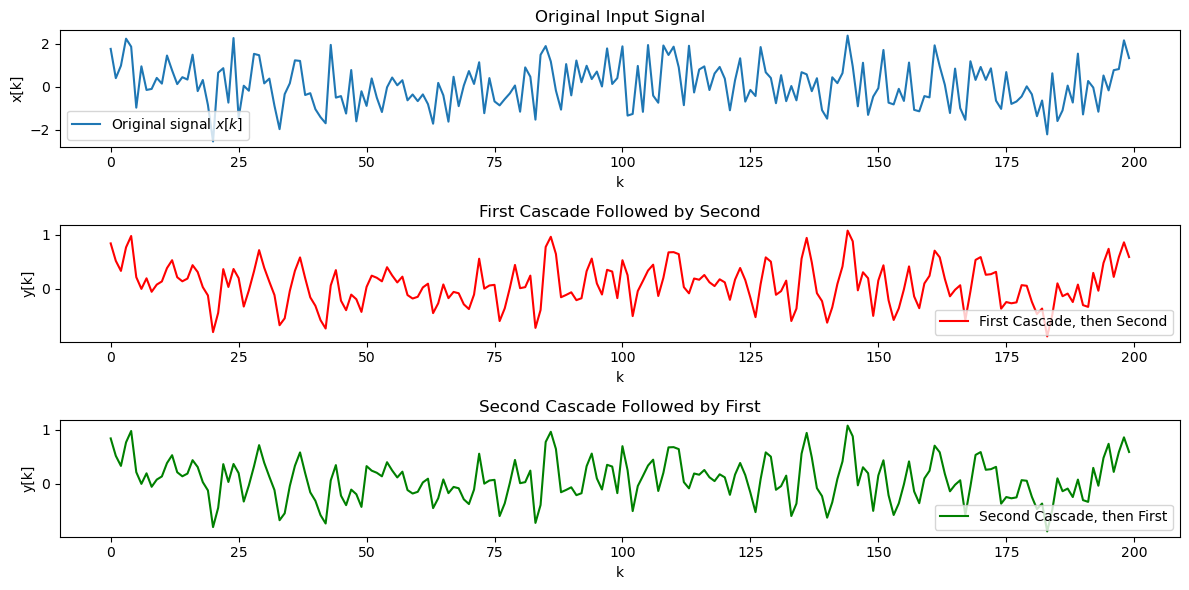

Do the outputs match? False


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Given parameters for variant 2
a = 1
b = 0.7
c = 0.4
M = 50
N = 200  # Length of input signal

# Generate a random input signal x[k] of length N
np.random.seed(0)  # For reproducibility
x = np.random.randn(N)

# First Cascade: y[k] = (a * x[k] + b * x[k - M] + c * x[k - 2M]) / (a + b + c)
def first_cascade(x, a, b, c, M):
    y = np.zeros_like(x)
    for k in range(N):
        x_M = x[k - M] if k >= M else 0  # Handle k-M
        x_2M = x[k - 2 * M] if k >= 2 * M else 0  # Handle k-2M
        y[k] = (a * x[k] + b * x_M + c * x_2M) / (a + b + c)
    return y

# Second Cascade: y[k] = (x[k] + x[k - 1]) / 2
def second_cascade(x):
    y = np.zeros_like(x)
    for k in range(1, N):
        y[k] = (x[k] + x[k - 1]) / 2
    y[0] = x[0]  # Handle the first element
    return y

# Apply the cascades in the original order (first, then second)
y_first_then_second = second_cascade(first_cascade(x, a, b, c, M))

# Apply the cascades in the reverse order (second, then first)
y_second_then_first = first_cascade(second_cascade(x), a, b, c, M)

# Plot the results for comparison
plt.figure(figsize=(12, 6))

# Plot the original signal
plt.subplot(3, 1, 1)
plt.plot(x, label='Original signal $x[k]$')
plt.title('Original Input Signal')
plt.xlabel('k')
plt.ylabel('x[k]')
plt.legend()

# Plot the result of first cascade followed by the second
plt.subplot(3, 1, 2)
plt.plot(y_first_then_second, label='First Cascade, then Second', color='r')
plt.title('First Cascade Followed by Second')
plt.xlabel('k')
plt.ylabel('y[k]')
plt.legend()

# Plot the result of second cascade followed by the first
plt.subplot(3, 1, 3)
plt.plot(y_second_then_first, label='Second Cascade, then First', color='g')
plt.title('Second Cascade Followed by First')
plt.xlabel('k')
plt.ylabel('y[k]')
plt.legend()

plt.tight_layout()
plt.show()

# Compare if the outputs are different
output_diff = np.allclose(y_first_then_second, y_second_then_first)
print(f"Do the outputs match? {output_diff}")


# Модуль 3. Аппроксимация идеальных частотно-избирательных фильтров и явление Гиббса

## Задача 3.1. Явление Гиббса для каузальной аппроксимации ИФНЧ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |   7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_c$  |0.1 |0.2 |0.3 |0.1 |0.2 |0.3 |0.2 |0.3 |0.1 | 0.2 |
|    $N$    | 30 | 20 | 30 | 20 | 30 | 20 | 24 | 22 | 26 | 28 |

Рассмотрите фильтр с импульсной характеристикой
$$
h[k] =
\left\{\begin{array}{l}
\dfrac{\sin(2\pi\nu_c (k-N))}{\pi (k-N)}, 0\le k \le 2N-1
\\
0, \; \text{при других } k.
\end{array}\right.
$$
для случая $\nu_c,\; N$ из варианта. 

Вычислите с помощью моделирования и постройте график АЧХ этого фильтра.  
Как изменяется АЧХ с ростом $N$ при фиксированной частоте среза $\nu_c$?

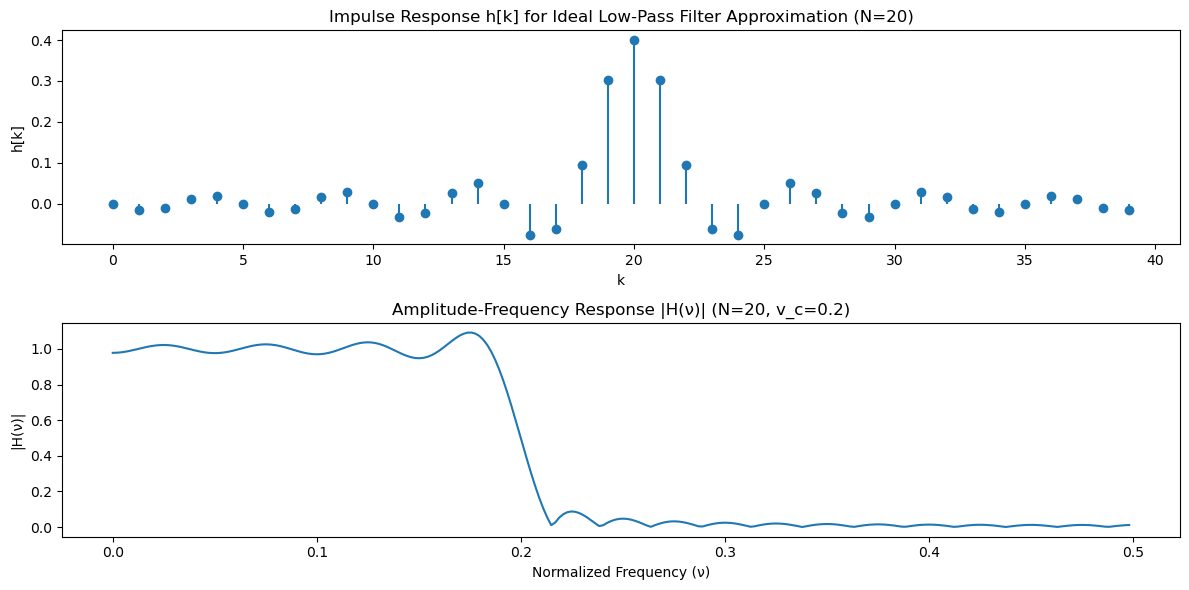

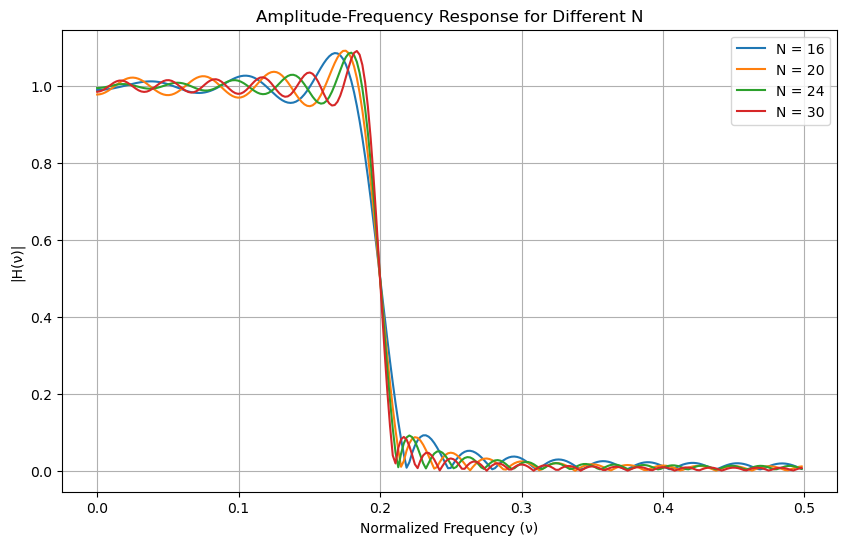

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters for variant 2
vc = 0.2  # Cutoff frequency
N = 20    # Length N

# Generate the impulse response h[k] for k = 0 to 2N-1
k = np.arange(2 * N)
h = np.zeros_like(k, dtype=float)

# Fill h[k] according to the formula (causal approximation)
for i in range(2 * N):
    if i != N:
        h[i] = np.sin(2 * np.pi * vc * (i - N)) / (np.pi * (i - N))
    else:
        h[i] = 2 * vc  # Special case for k = N

# Step 2: Compute the frequency response using the FFT
H = np.fft.fft(h, 512)  # Zero-padding to 512 points for better frequency resolution
frequencies = np.fft.fftfreq(512)

# Plot the impulse response h[k]
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.stem(k, h, basefmt=" ")
plt.title('Impulse Response h[k] for Ideal Low-Pass Filter Approximation (N=20)')
plt.xlabel('k')
plt.ylabel('h[k]')

# Plot the amplitude-frequency response |H(ν)|
plt.subplot(2, 1, 2)
plt.plot(frequencies[:256], np.abs(H[:256]))  # Plot only the positive frequencies
plt.title('Amplitude-Frequency Response |H(ν)| (N=20, v_c=0.2)')
plt.xlabel('Normalized Frequency (ν)')
plt.ylabel('|H(ν)|')

plt.tight_layout()
plt.show()

# Step 3: Varying N and observing Gibbs phenomenon
N_values = [16, 20, 24, 30]  # Different values of N to investigate Gibbs phenomenon

plt.figure(figsize=(10, 6))
for N_var in N_values:
    # Regenerate h[k] for the new N
    k_var = np.arange(2 * N_var)
    h_var = np.zeros_like(k_var, dtype=float)
    
    for i in range(2 * N_var):
        if i != N_var:
            h_var[i] = np.sin(2 * np.pi * vc * (i - N_var)) / (np.pi * (i - N_var))
        else:
            h_var[i] = 2 * vc  # Special case for k = N_var
    
    # Compute the frequency response for this N
    H_var = np.fft.fft(h_var, 512)
    
    # Plot the amplitude-frequency response
    plt.plot(frequencies[:256], np.abs(H_var[:256]), label=f'N = {N_var}')

plt.title('Amplitude-Frequency Response for Different N')
plt.xlabel('Normalized Frequency (ν)')
plt.ylabel('|H(ν)|')
plt.legend()
plt.grid(True)
plt.show()


## Задача 3.2.  Аппроксимация фильтра с заданной частотной характеристикой с помощью ДВПФ   

Определить импульсную характеристику $h_{ideal}[k]$ фильтра, частотная характеристика которого является действительной функцией частоты и представлена на рисунке. 

Рассмотреть фильтр, импульсная характеристика которого в отличии от $h_{ideal}[k]$  усечена до $2N$ отсчетов и сдвинута на $N$ отсчетов вправо. С помощью моделирования определить и построить график АЧХ. Сравнить АЧХ обоих фильтров.

Рисунок генерируется с помощью функции `task_3_2(variant)` (приведенной ниже), где `variant` – номер варианта. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
def task_3_2(variant):
    nu_c1 = [0.2, 0.15, 0.15, 0.1, 0.15, 0.15, 0.2, 0.15, 0.15, 0.1]
    amp1 = [1,  0, 0.2, 1, 1, 0.6, 0.3, 0.2, 1, 1]
    nu_c2 = [0.4, 0.35, 0.4,  0.3,  0.35,  0.4, 0.4,  0.3,  0.35,  0.4]
    amp2 = [0.4, 1, 1, 0.4, 0.7,  1, 1, 1, 0.4, 0.7]
    def H_val(nu, n):
        return amp1[n] if abs(nu)<=nu_c1[n] else amp2[n] if abs(nu)<=nu_c2[n] else 0.0
    nu=np.arange(-0.5, 0.5, 0.001)
    plt.figure(figsize=[6, 2], dpi=140)
    plt.plot(nu, [H_val(x, variant-1) for x in nu] ,'g-')
    plt.xticks([-0.5, -nu_c2[variant-1], -nu_c1[variant-1], 0, nu_c1[variant-1], nu_c2[variant-1], 0.5])
    plt.grid()
    plt.yticks([0, min(amp1[variant-1],amp2[variant-1]), 1])
    plt.xlim([-0.5, 0.5])
    plt.xlabel("Нормированнная частота, $\\nu$")
    plt.ylabel("$H(\\nu)$")
    plt.title("Вариант %i" %variant)
    plt.tight_layout()
    plt.show()

Пример вывода задания для первого варианта.

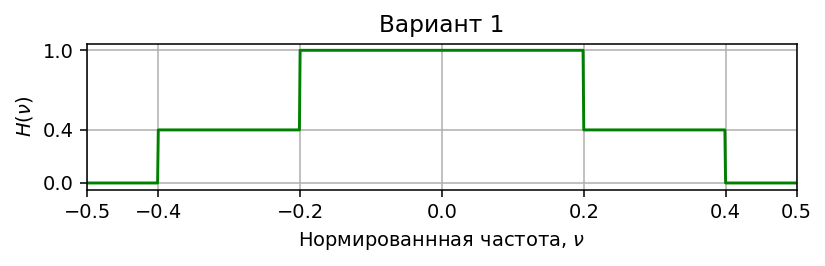

In [3]:
task_3_2(variant=1)

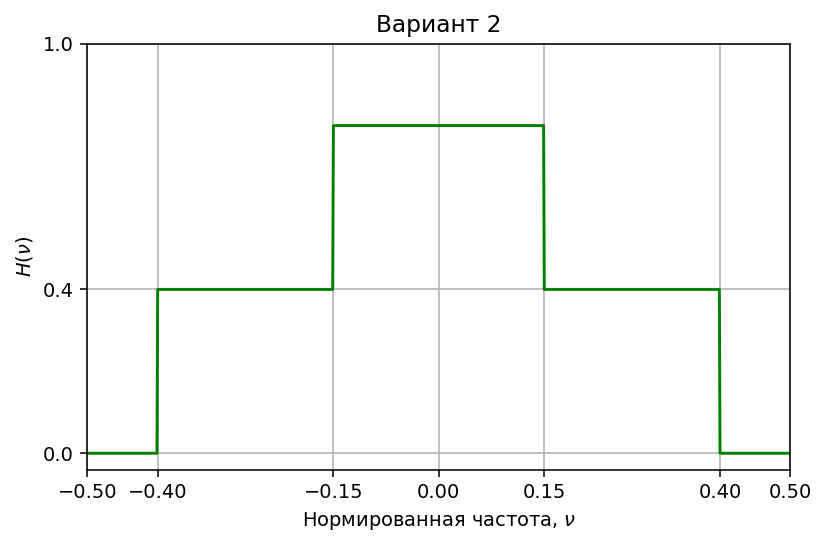

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def task_3_2(variant):
    nu_c1 = [0.2, 0.15, 0.2, 0.15, 0.2, 0.15, 0.2, 0.15, 0.15, 0.1]
    amp1 = [1, 0.8, 0.6, 0.6, 1, 0.8, 1, 0.8, 1, 1]
    nu_c2 = [0.5, 0.4, 0.4, 0.3, 0.4, 0.3, 0.4, 0.35, 0.4, 0.4]
    amp2 = [0.4, 0.4, 0.4, 0.3, 0.35, 0.4, 0.4, 0.35, 0.4, 0.7]

    def H_val(nu):
        return amp1[variant-1] if abs(nu) <= nu_c1[variant-1] else amp2[variant-1] if abs(nu) <= nu_c2[variant-1] else 0.0

    nu = np.arange(-0.5, 0.5, 0.001)
    
    plt.figure(figsize=(6, 4), dpi=140)
    plt.plot(nu, [H_val(x) for x in nu], 'g-')
    plt.xticks([-0.5, -nu_c2[variant-1], -nu_c1[variant-1], 0, nu_c1[variant-1], nu_c2[variant-1], 0.5])
    plt.grid()
    plt.yticks([0, min(amp1[variant-1], amp2[variant-1]), 1])
    plt.xlim([-0.5, 0.5])
    plt.xlabel("Нормированная частота, $\\nu$")
    plt.ylabel("$H(\\nu)$")
    plt.title(f"Вариант {variant}")
    plt.tight_layout()
    plt.show()

# Run the function for variant 2
task_3_2(variant=2)
